<a href="https://colab.research.google.com/github/htapiagroup/fis_uv/blob/master/ICD_FisUV_Sem4_RegresionLineal_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion a la Ciencia de Datos
Overview
Duration: 0:02:00

En esta semana vamos a implementar regresion lineal usando el algoritmo descenso por el grandiente aprovechando las capacidades vectoriales del lenguaje de programacion, y lo iremos modificando para poderlo usar en diversos escenarios. Despues iremos a regresion logistica

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.compat import StringIO

In [0]:
data="""26.4, 1.09, 1.13, 1.08, 1.06, 1.09, 1.09, 0.04 \n 
35.4, 1.33, 1.27, 1.32, 1.25, 1.22, 1.28, 0.05 \n
38.7, 1.33, 1.36, 1.41, 1.33, 1.25, 1.34, 0.08 \n
46.6, 1.46, 1.40, 1.34, 1.45, 1.29, 1.39, 0.10 \n
52.2, 1.64, 1.57, 1.56, 1.55, 1.60, 1.58, 0.05 \n
57.3, 1.55, 1.50, 1.68, 1.55, 1.58, 1.57, 0.10 \n
63.2, 1.64, 1.64, 1.70, 1.82, 1.74, 1.71, 0.11 \n
72.4, 1.85, 1.78, 1.82, 1.80, 1.82, 1.81, 0.04 \n
86.5, 1.92, 1.92, 1.94, 1.95, 1.95, 1.94, 0.02"""

df = pd.read_csv(StringIO(data), names=["L", "T1", "T2", "T3", "T4", "T5", "ave", "unc"])
df

,L,T1,T2,T3,T4,T5,ave,unc
0,26.4,1.09,1.13,1.08,1.06,1.09,1.09,0.04
1,35.4,1.33,1.27,1.32,1.25,1.22,1.28,0.05
2,38.7,1.33,1.36,1.41,1.33,1.25,1.34,0.08
3,46.6,1.46,1.40,1.34,1.45,1.29,1.39,0.10
4,52.2,1.64,1.57,1.56,1.55,1.60,1.58,0.05
5,57.3,1.55,1.50,1.68,1.55,1.58,1.57,0.10
6,63.2,1.64,1.64,1.70,1.82,1.74,1.71,0.11
7,72.4,1.85,1.78,1.82,1.80,1.82,1.81,0.04
8,86.5,1.92,1.92,1.94,1.95,1.95,1.94,0.02


In [0]:
X, y = np.array(df)[:, 0], np.array(df)[:, 1]
y *= y
m = y.size

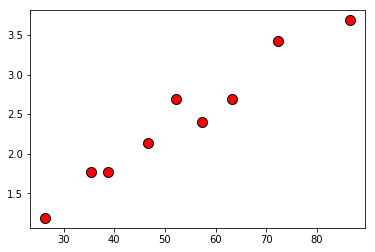

In [0]:
plt.plot(X, y, 'ro', ms=10, mec='k')

<a id="section1"></a>
### 1.2 Ecuacion Maestra

Vimos que la multiplicacion de matrices nos da el resultado optimo:

#### 2.2.1 Equaciones

#### 2.2.2 Implementacion


In [0]:
X

array([26.4, 35.4, 38.7, 46.6, 52.2, 57.3, 63.2, 72.4, 86.5])

In [0]:
X = np.stack([np.ones(m), X], axis=1)

In [0]:
X

array([[ 1. , 26.4],
       [ 1. , 35.4],
       [ 1. , 38.7],
       [ 1. , 46.6],
       [ 1. , 52.2],
       [ 1. , 57.3],
       [ 1. , 63.2],
       [ 1. , 72.4],
       [ 1. , 86.5]])

In [0]:
Xt = X.transpose()
Xt.shape

(2, 9)

In [0]:
M = Xt.dot(X)
M

array([[9.000000e+00, 4.787000e+02],
       [4.787000e+02, 2.834575e+04]])

In [0]:
np.dot(Xt,X)

array([[9.000000e+00, 4.787000e+02],
       [4.787000e+02, 2.834575e+04]])

In [0]:
detM = np.linalg.det(M)
1/detM

3.852368012093354e-05

In [0]:
Minv = np.linalg.inv(M)

In [0]:
M.dot(Minv)

array([[1.00000000e+00, 4.38256452e-18],
       [2.49106291e-15, 1.00000000e+00]])

In [0]:
Minv.dot(Xt)

array([[ 6.05132664e-01,  4.39161093e-01,  3.78304850e-01,
         2.32618693e-01,  1.29347494e-01,  3.52969367e-02,
        -7.35066488e-02, -2.43166477e-01, -5.03188605e-01],
       [-9.28805928e-03, -6.16764119e-03, -5.02348789e-03,
        -2.28445423e-03, -3.42860753e-04,  1.42537616e-03,
         3.47098358e-03,  6.66074429e-03,  1.15493993e-02]])

In [0]:
theta_em = Minv.dot(Xt).dot(y)
print(theta_em)

[0.20862232 0.04150929]


que coincide con el resultado que obtenemos usando la librearia `scikit`

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
x = X[:,1].reshape(-1,1)
regr = lr.fit(x, y)
y_pred = lr.predict(x)

In [0]:
regr.coef_[0]

0.04150929422306598

<a id="section2"></a>
### 2.2 Descenso por el Gradiente

En esta parte vana ajustar los parametros de regresion lineal $\theta$ al conjunto de datos usando descenso por el gradiente.

#### 2.2.1 Ecuaciones

El objetivo de regresion es minimizar la funcion costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

con la hipotesis $h_\theta(x)$ dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo, los valores de $\theta_j$ se ajustan a modo de minimizar el costo $J(\theta)$. Una forma de hacerlo es usando el algoritmo del descenso por el gradiente, en el cual en cada iteracion se actualizan los parametros por medio de la regla 

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{los valores } \theta_j \text{ se actualizan simultaneamenta para todo } j$$

En cada paso del descenso por el gradiente, los parametros $\theta_j$ se acercan a los valores optimos que daran el menor costo J($\theta$). Este algoritmo se conoce como descenso por el grandiente en grupo (batch gradient descent).

<div class="alert alert-block alert-warning">
**Nota de Implementacion:** Cada instancia sera guardada en un renglon de la matriz $X$. Para tomar en cuenta el termino constante del modelo lineal, agregamo suna columna adicional con valores de uno . De este modo $\theta_0$ corresponde a otra caracteristica del conjunto de datos.
</div>


#### 2.2.2 Implementacion

Ya construimos la matriz para usarla con regresion lineal. En las siguientes lineas de codigo vamos a imlementar el algoritmo paso por paso usando iteraciones y listas, no aprovecharemos la vectorizacoin de operaciones pero haciendo cada paso entenderemos lo que hace el algoritmo.

In [0]:
# definimos una funcion que hace el producto
def linh(x, theta):
  return theta[0]*x[0] + theta[1]*x[1]

Que cuando aplicada a nuestra matriz  con el vector $\theta=(0,0)$ resulta en 

In [0]:
X[0]

array([ 1. , 26.4])

In [0]:
theta=np.ones(2)

In [0]:
linh(X[0], theta)

27.4

In [0]:
hipLineal=[linh(instancias,theta) for instancias in X]

In [0]:
# el error en cada instancia al usar la hipotesis lineal
hipLineal - y

array([26.2119, 34.6311, 37.9311, 45.4684, 50.5104, 55.8975, 61.5104,
       69.9775, 83.8136])

In [0]:
# definir una funcion que evalue el error
def error(X, y, theta):
    '''
    Utiliza la funcion linh y list comprehension para 
    evaluar el error sobre X para una lista de parametros theta
    '''
    hipl = [linh(instancias,theta) for instancias in X]
    return hipl - y

In [0]:
error(X, y, theta)

array([26.2119, 34.6311, 37.9311, 45.4684, 50.5104, 55.8975, 61.5104,
       69.9775, 83.8136])

Ahora podemos calcular el error que realizamos al usar la hipotesis en cada instancia 

In [0]:
# error al suponer la hipotesis en cada instancia de X
e = error(X, y, [1,1])
e

array([26.2119, 34.6311, 37.9311, 45.4684, 50.5104, 55.8975, 61.5104,
       69.9775, 83.8136])

Luego obtuvimos los terminos de las derivada respecto a cada parametro por separado, actualizamos los parametros usando el algoritmos y obtenemos un nuevo valor del vector como sigue

In [0]:
print(theta)
djd0 = e*X[::,0]
djd1 = e*X[::,1]
dJ = np.array([djd0.sum(), djd1.sum()])
theta = theta - alpha*dJ
print(theta)

[1. 1.]
[ 0.95340481 -1.75479704]


Este es un paso del algoritmo, ahora trataremos de generalizarlo usando una implementacion vectorial

<a id="section2"></a>
#### 2.2.3 Calculando el costo $J(\theta)$

Es conveniente tener un metodo para calcular la funcion costo $J(\theta)$ conforme usamos el descenso por el gradiente, con el fin de monitorear la convergencia del algoritmo. La siguiente funcion calcula $J(\theta)$ para usarse como monitoreo en el algoritmo. 

Noten que en el ejercicio anterior usamos el error, ahora usaremos el valor de la function para monitorear convergencia.

Recordemos que  $X$ y $y$ no son escalares, son matrices: $X$ es una matriz cuyos renglones representan los ejemplos (instancias) de un conjunto de entrenamiento y $y$ es un vector cuyas entradas representan el valor de cada renglon de $X$.
<a id="computeCost"></a>

In [0]:
def calculaCosto(X, y, theta):
  
  m = y.size
  
  J = 0
  
  h = np.dot(X, theta)
  
  J = (1/(2*m)) * np.sum(np.square(np.dot(X, theta) - y))
  
  return J

El valor de la funcion costo para $\theta=[0.,0]$


In [0]:
calculaCosto(X, y, np.zeros(X.shape[1]))

3.208681576111111

El valor de la funcion costo para $\theta=[1,1]$

In [0]:
calculaCosto(X, y, np.ones(X.shape[1]))

1487.413939353889

Descenso por el gradiente

In [0]:
def desGrad(X, y, theta, alpha, num_iters):
  
  m = y.shape[0]
  
  theta = theta.copy()
  
  J_his = []
  
  for it in range(num_iters):
    
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    
    J_his.append(calculaCosto(X, y, theta))
    
  return theta, J_his

Probemos que este algoritmo efectivamente reproduce nuestra primera implementacion

In [0]:
theta = np.ones(X.shape[1])
print(theta)

e = error(X, y, theta) # actualiza el error
djd0 = e*X[::,0]
djd1 = e*X[::,1]
dJ = np.array([djd0.sum(), djd1.sum()])
theta = theta - alpha*dJ

print(theta)

[1. 1.]
[ 0.95340481 -1.75479704]


In [0]:
theta = np.ones(X.shape[1])
print(theta)

theta, J = desGrad(X, y, theta, alpha, 1)

print(theta)

[1. 1.]
[0.99482276 0.69391144]


<div class="alert alert-block alert-warning">Porque no son iguales?
</div>


In [0]:
theta = np.ones(X.shape[1])
print(theta)

e = error(X, y, theta) # actualiza el error
djd0 = e*X[::,0]
djd1 = e*X[::,1]
dJ = np.array([djd0.sum(), djd1.sum()])
theta = theta - (alpha / m)*dJ

print(theta)

[1. 1.]
[0.99482276 0.69391144]


Resuelto ese asunto, iteramos el algoritmo hasta el cansancio

In [0]:
theta = np.zeros(X.shape[1])

iteraciones = 15000
alpha = 0.0001

theta, J = desGrad(X, y, theta, alpha, iteraciones)

print(theta)

[0.03017569 0.04452298]


Y graficamos nuestras soluciones

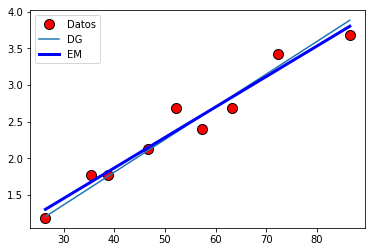

In [0]:
plt.plot(X[:, 1], y, 'ro', ms=10, mec='k')
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.legend(['Datos', 'DG', 'EM']);

In [0]:
print([regr.intercept_, regr.coef_[0]])
print(theta_em)
print(theta)


[0.20862231726870162, 0.04150929422306598]
[0.20862232 0.04150929]
[0.03017569 0.04452298]


Visualizando la funcion costo

In [0]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 1, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calculaCosto(X, y, [theta0, theta1])

In [0]:
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T


Text(0.5, 0.92, 'Surface')

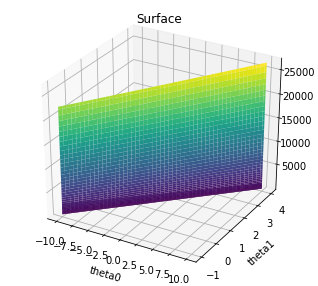

In [0]:
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')


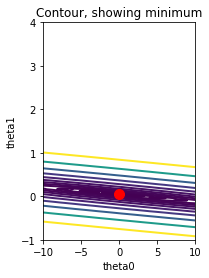

In [0]:

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

## 3 Regresion lineal con multiples variables

En esta parte vamos a implementar regresion con multiples variables para predecir los precios de las casas. 

El archivo de texto `Data/ex1data2.txt` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna representa el area de la construccion (en pies cuadrados), la segunda columna el numero de recamaras y la tercera el precio de venta.

<a id="section3"></a>

### 3.1 Normalizacion

Comenzamos por explorar el conjunto de datos. Viendo los valores notamos que las dimensiones de las casas son del orden de 1000 veces mas grandes que el numero de cuartos. Esperamos que esto se vea relfejado de alguna forma....vamos a ver cual 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO


In [0]:
# load data
txt='''2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900
1534,3,314900
1427,3,198999
1380,3,212000
1494,3,242500
1940,4,239999
2000,3,347000
1890,3,329999
4478,5,699900
1268,3,259900
2300,4,449900
1320,2,299900
1236,3,199900
2609,4,499998
3031,4,599000
1767,3,252900
1888,2,255000
1604,3,242900
1962,4,259900
3890,3,573900
1100,3,249900
1458,3,464500
2526,3,469000
2200,3,475000
2637,3,299900
1839,2,349900
1000,1,169900
2040,4,314900
3137,3,579900
1811,4,285900
1437,3,249900
1239,3,229900
2132,4,345000
4215,4,549000
2162,4,287000
1664,2,368500
2238,3,329900
2567,4,314000
1200,3,299000
852,2,179900
1852,4,299900
1203,3,239500'''

In [0]:
c = StringIO(txt)

In [0]:
data = np.loadtxt(c, delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [0]:
X = np.insert(X, 0, 1, axis = 1)

#### Tarea

Realizar una descripcion general de los datos contenidos en la matriz X usando las funciones de la libreria `pandas`

Usaremos el algoritmo del descenso para ajustar los parametros a un modelo lineal

In [0]:
regr.coef_
regr.intercept_

In [0]:
def calculaCosto(X, y, theta):
  
  m = y.size
  
  J = 0
  
  h = np.dot(X, theta)
  
  J = (1/(2*m)) * np.sum(np.square(np.dot(X, theta) - y))
  
  return J

In [0]:
def desGrad(X, y, theta, alpha, num_iters):
  
  m = y.shape[0]
  
  theta = theta.copy()
  
  J_his = []
  
  for it in range(num_iters):
    
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    
    J_his.append(calculaCosto(X, y, theta))
    
  return theta, J_his

In [0]:
theta = np.random.rand(X.shape[1])

iteraciones = 1500
alpha = 0.0000001

theta, J = desGrad(X, y, theta, alpha, iteraciones)

print(theta)

[  1.90657496 165.37757012   3.34297719]


In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
regr = lr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[  139.21067402 -8738.01911233]
89597.90954279754


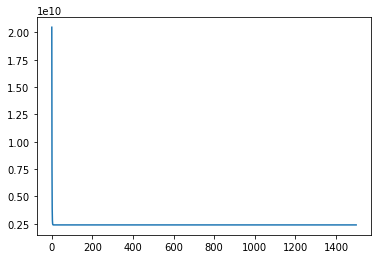

In [0]:
plt.plot(J)